# Charecteristics Of Gradient Boost

## #1 `Single Leaf` : the first weak learner in Gradient Boost 

- In AdaBoost we have stumps as the weak learners
- But in Gradient Boosting, the first weak learner is just a single leaf doing a singular prediction for the whole dataset.
- This leaf represents a wild initial guess the algorithm makes.

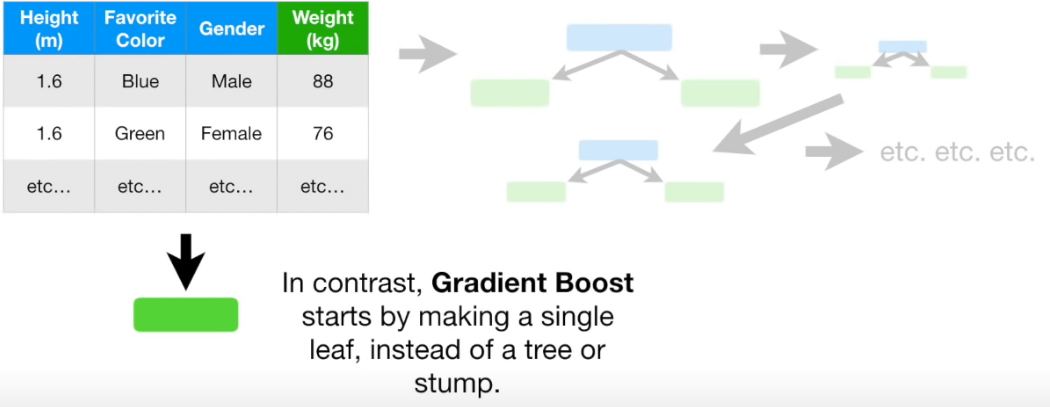

## #2 Other Weak Learners are `Restricted Trees` but not `Stumps`

- Again in AdaBoost all weak learners are Stumps
- But in Gradient Boost , Except for the first weak learner which is just a leaf, others are trees with multiple branches
- Although Gradient Boost Does limit the size of its Trees , but they all are bigger than a stump
- In Practice People limit the maximum leaves  in Gradient Boost to `8 - 32 leaves Tree`

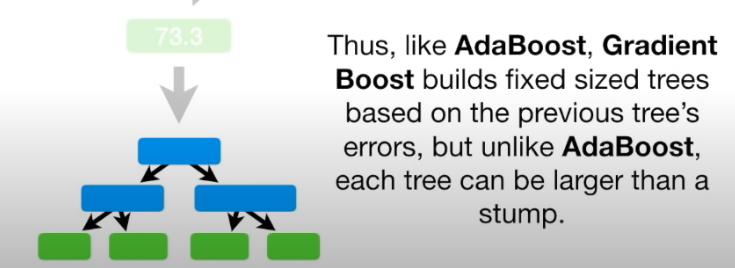

## #3 Scaling Of Each Weak Learner

- In AdaBoost it scales its weak learners by their `Amount of say` they have
- The More is someone's `Amount of say` , he is reflected more in final prediction than others

- But here in Gradient Boost all of the weak learners are scaled the same
- Here the scaling agent is `Learning Rate`

## #4 Order Matters

- Just like AdaBoost, Order Matters in Gradient Boosting
- The mistake of one weak learner affects the decision making of another

# Working Of Gradient Boost (Regression)

### Lets Consider Following Dataset:
- we want to predict the weight
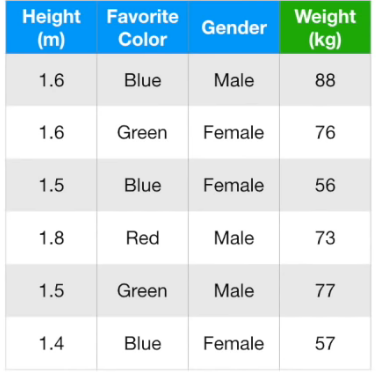

## `Step - 1` :  Construct the First `Only Leaf` learner

- In gradient boost we have the first learner having only a single leaf.
- It takes a guess at the prediction ( Hypothetically considering it satisfies all datapoints)

- Here the prediction is the Average weight of all datapoints
- If we stop Gradient Boost here it will give prediction to any new datapoint as the Average Weight value

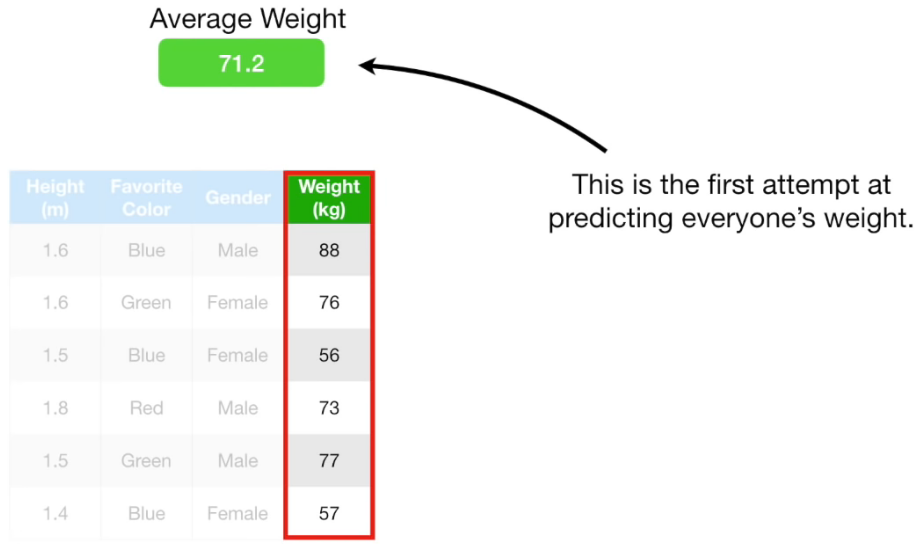

## `Step - 2` :  Calculate The Residual

- Residual is : How far off the prediction is from the actual value Now
- It can be both positive and negetive
- `Residual = ( Observed Weight - Predicted Weight )`

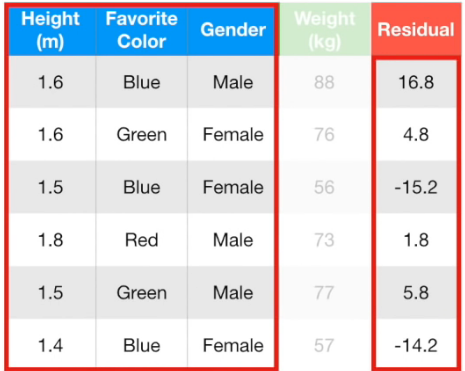

## `Step - 3` :  Creating the second learner

- The Learners after the first one are preety peculier
- First they are full trees (of course with some restriction) , but are no stumps
- They try to fit the dataset with target variable as `Residual`  instead of the weight

- The reason why they are used to fit to `Residual` and not direct weight because, if we do so, it will be Random Forest
- We already have the first prediction as the average
- if Now we can successfully predict the `Residual` correctly, we can find the actual weight by adding Residual to the Average weight

- Here we have `Restricted` all other learners to have maximum `4 - leaves` at the end
- We get the following tree out of it :

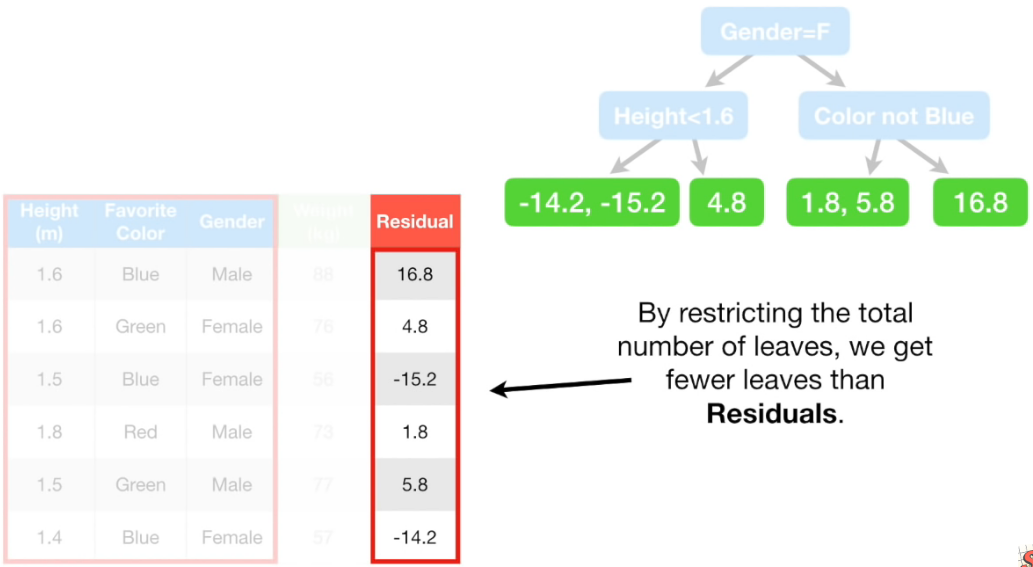

## `Step - 4` :  Learner Classifies each datapoint based on `Residual`

- Since in classification we have fewer leaves wrt to the datapoints, some leaves will end up with more then one entries
- For those datapoints in that leaves we consider the average of those Residual 

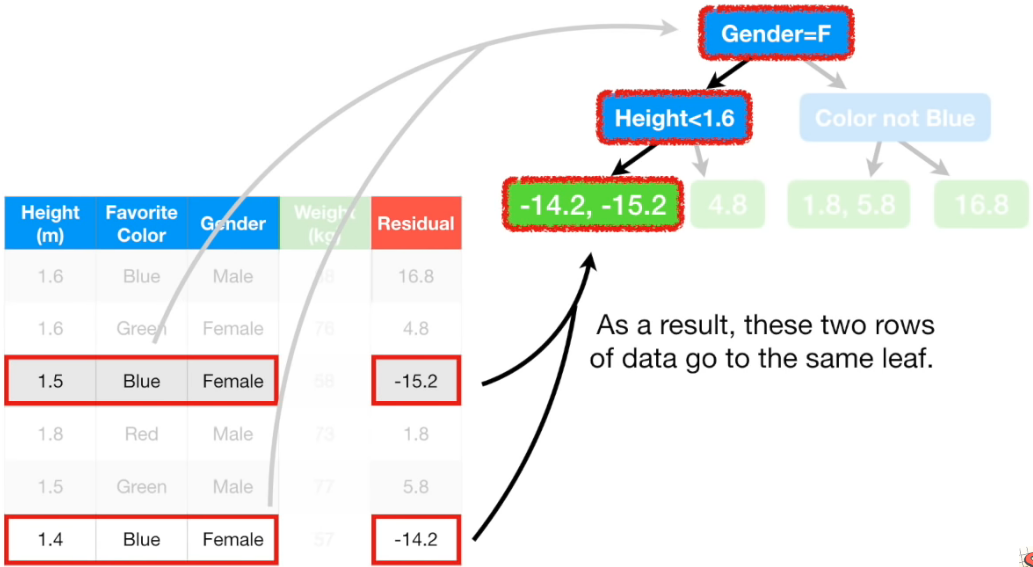

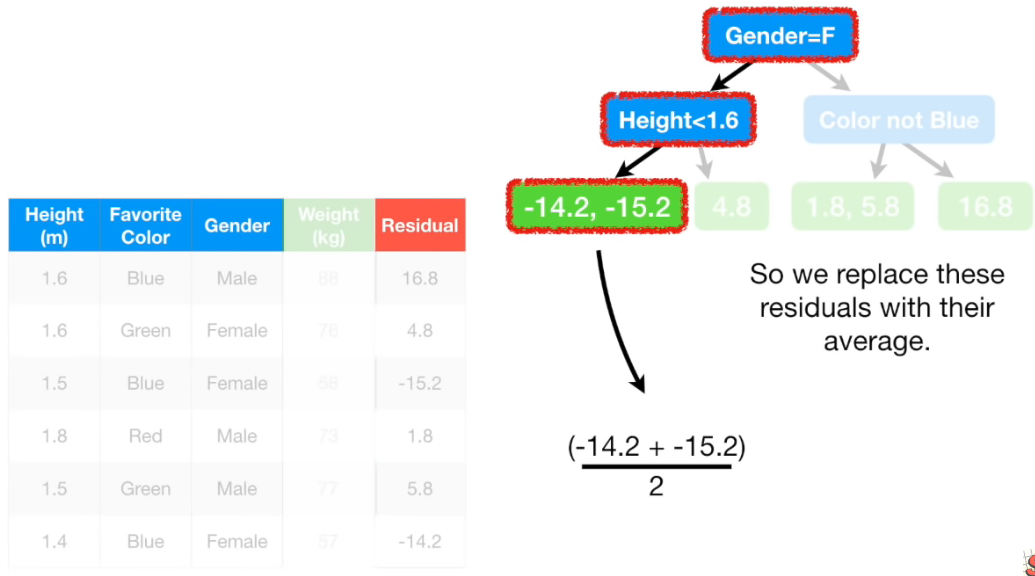

## `Step - 5` :  Scaling the learner

- Now that the learner has finished classifying , we can retry to predict weights again
- we combine the First Leaf's Prediction and the Residual Prediction by current learner to arrive at a prediction for each datapoint

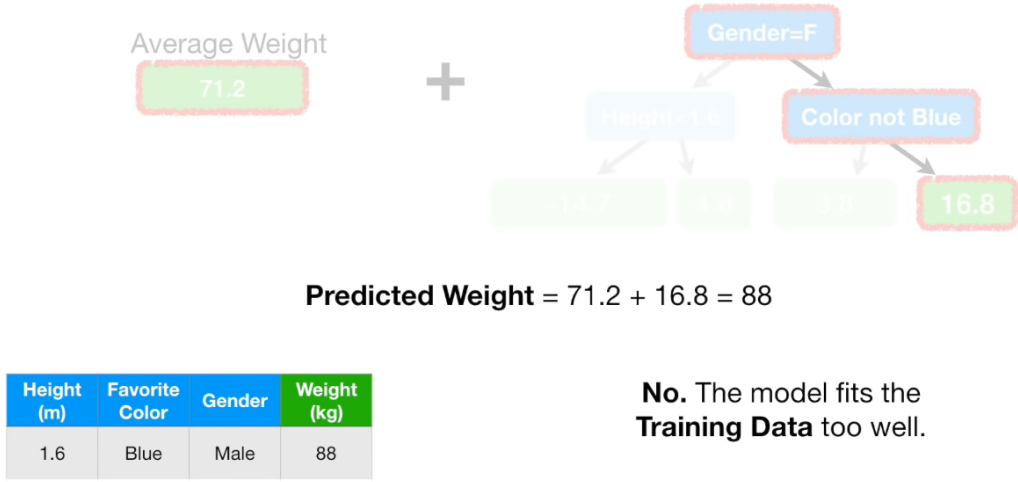

- The reason we scale the model's prediction beacause, even if it has low Bias, the Varience is too high and its risky.
- It is better to take small steps on the right direction than to make a giant leap and miss the true prediction completely
- In above picture the model successfully predicted the weight of the first datapoint with just two learners, but it may not be same for every datapointsm and may not be same after the third one
- So introduce an agent `Learning Rate` which controls our step length
- we know we are going in right direction, but inorder to not miss the destination we need to take small steps at a time.

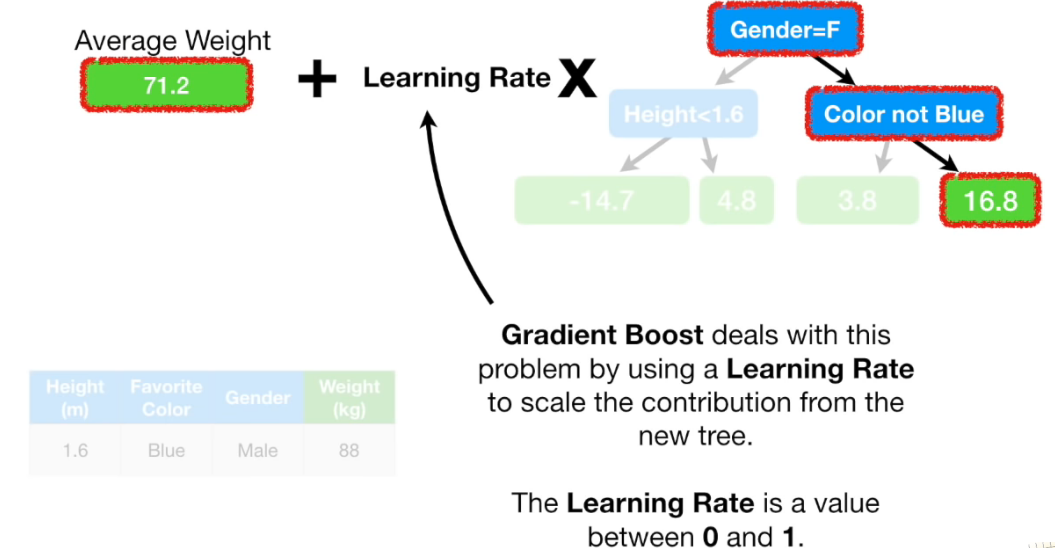

- For This Example we set the learning rate as  : 0.1

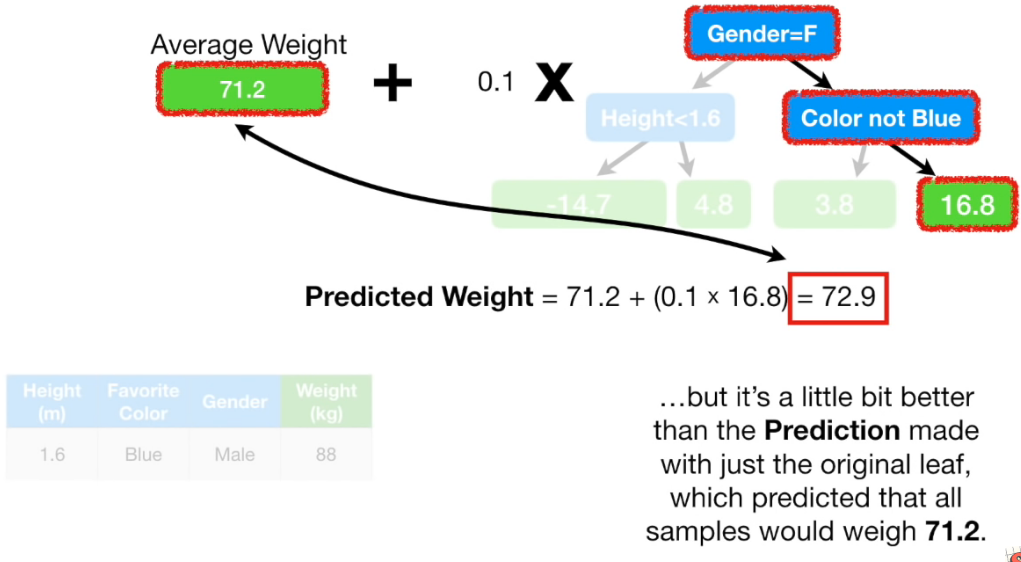

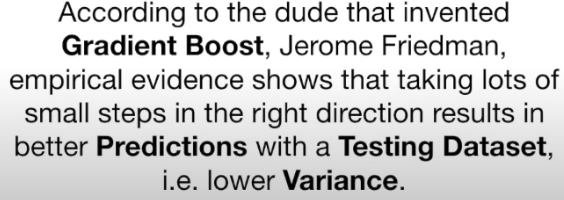

## `Step - 6` :  Forming the new residual Table

- We calculate Residual by the same formula we used before : `Residual = ( Observed Weight - Predicted Weight )`
- But this time for `Predicted Weight` we consider the contribution of the current learner as well.
- This way the current learner affects the next learner

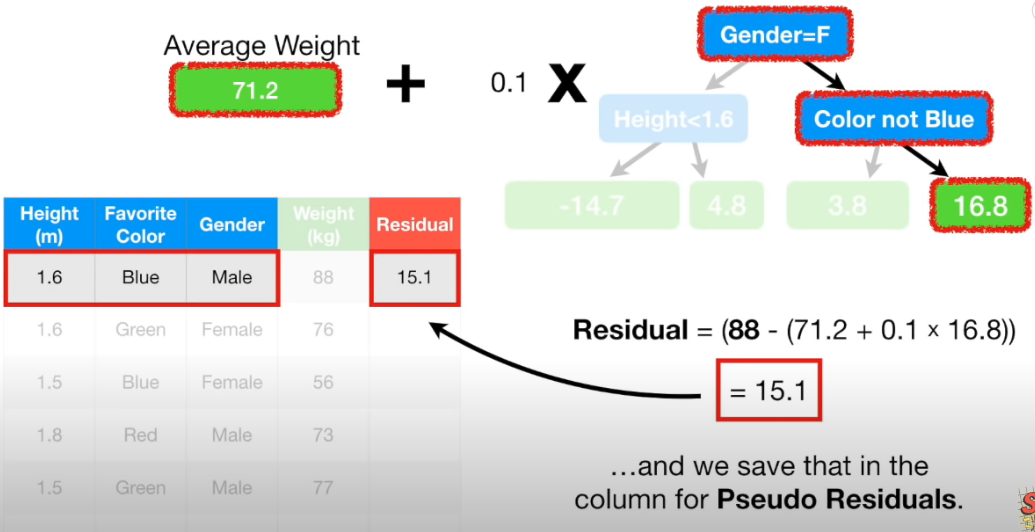

- now current dataset looks like :

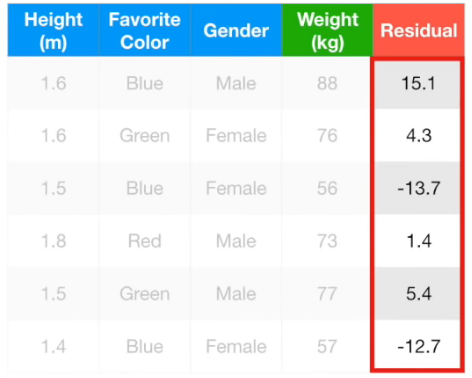

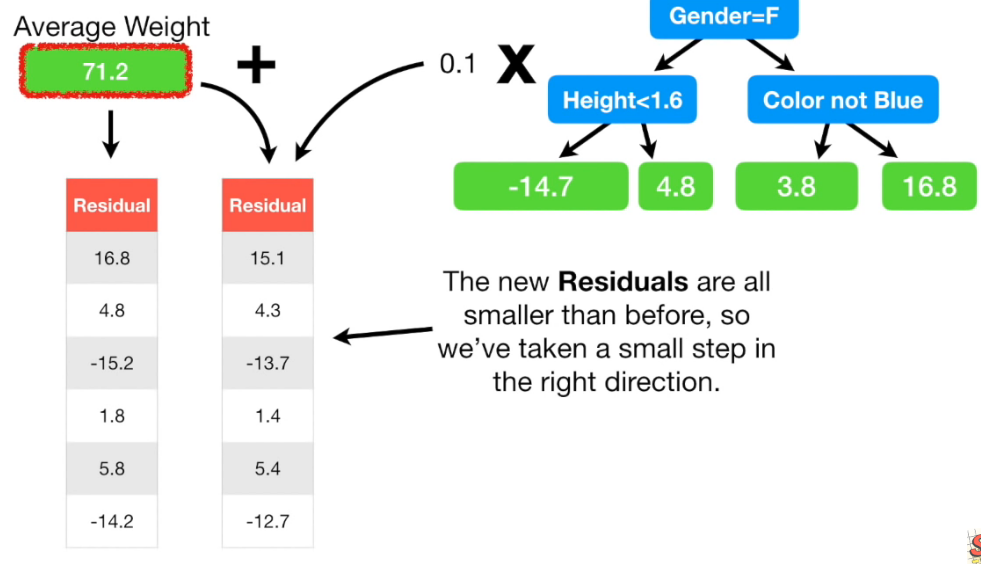

## `Step - 7` :  Continueing making new learners

- Just like second learner we continue to make new learners, but while calculating `Predicted Weight` we combine all learner's contriution

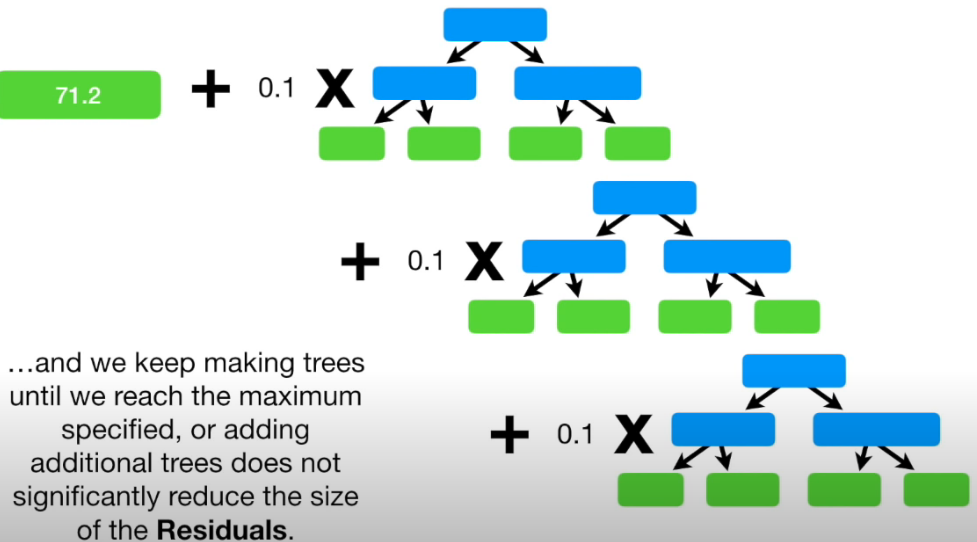

## `Final Step` :  Prediction Of A New Datapoint

- For the new datapoint it will pass through all learners generating a series of `Residues` and they will be added to the Average Weight to provide the prediction.

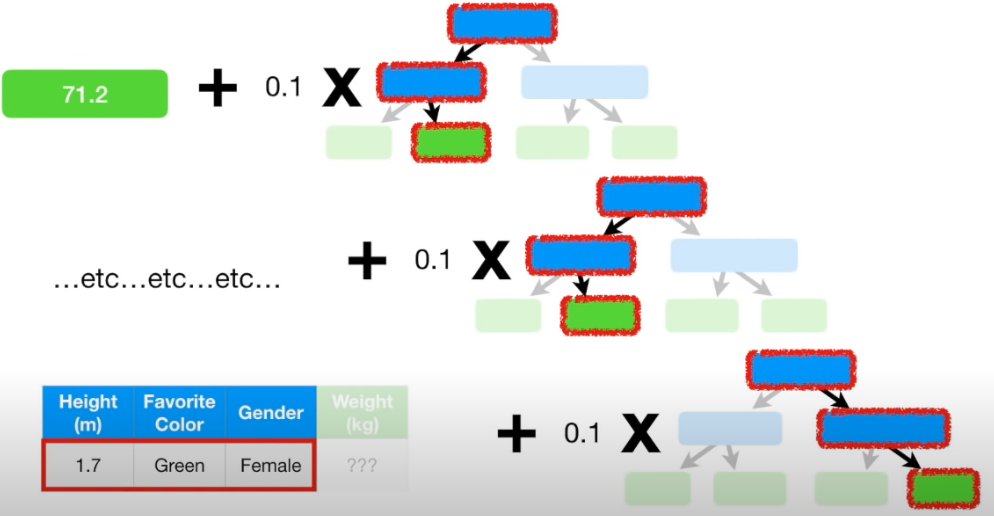

# Gradient Boosting ( Binary Classification )

- Its exactly the same as resgression but there are some changes.
- The first leaf learner takes the log loss as its prediction, then we convert that into probability.
- We calculate the difference in the probability of the class to the prediction, that makes the residue
- We train learners and at last we aggregrate their residue and add it to the initial prediction
- If the final probability > 0.5 then represents `class 1` else it represents `class 0`.